In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from sklearn.metrics import mean_squared_error as mse

In [87]:
dtrain=pd.read_csv('trainset.csv')
dtrain.columns
dtrain.head()
dtrainset=dtrain.iloc[:,1:2].values

In [88]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(dtrainset)
training_set_scaled.shape

(1259, 1)

In [89]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i,0])
    y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1199, 60)

In [91]:
model = Sequential([layers.SimpleRNN(42,input_shape=(60,1)),layers.Dense(1)])
model.compile(optimizer='adam',loss='mse')
model.summary()
model.fit(X_train1,y_train,epochs=50, batch_size=32)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)             │ (None, 42)                  │           1,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              43 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0363
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8255e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6448e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3116e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9602e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9106e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7485e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3863e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6830e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5931e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9747e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0165e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2074e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━

In [92]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape

(125, 1)

In [93]:
dataset_total = pd.concat((dtrain['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
    X_test.append(inputs_scaled[i-60:i,0])
    y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

(1324, 60, 1)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


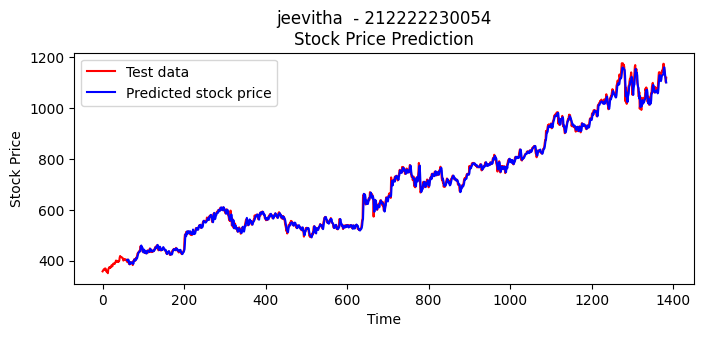

In [96]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)
plt.figure(figsize=(8,3))
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test data')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue',label = 'Predicted stock price')
plt.title('jeevitha  - 212222230054\nStock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [97]:
print('jeevitha')
print(mse(y_test,predicted_stock_price))

jeevitha
536085.4381062799
